In [1]:
# Notebook dependencies

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

2022-12-01 18:05:52.180138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Directories

train_dir = '/Users/rdhillon/Desktop/Preprocessed'
test_dir = '/Users/rdhillon/Desktop/asl_alphabet_test'

In [3]:
def get_data(data_dir) :
    images = []
    labels = []
    i = 0
    
    dir_list = os.listdir(data_dir)
    for item in dir_list:

        if item != '.DS_Store':
            print("Obtaining images of", item, "...")
            for image in os.listdir(data_dir + "/" + item):
                if image != '.DS_Store':
                    img = cv2.imread(data_dir + '/' + item + '/' + image)
                    images.append(img)
                    labels.append(i)
        i = i + 1
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of R ...
Obtaining images of U ...
Obtaining images of I ...
Obtaining images of N ...
Obtaining images of G ...
Obtaining images of Z ...
Obtaining images of T ...
Obtaining images of S ...
Obtaining images of A ...
Obtaining images of F ...
Obtaining images of O ...
Obtaining images of H ...
Obtaining images of del ...
Obtaining images of nothing ...
Obtaining images of space ...
Obtaining images of M ...
Obtaining images of J ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of V ...
Obtaining images of Q ...
Obtaining images of X ...
Obtaining images of E ...
Obtaining images of B ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of Y ...
Obtaining images of P ...
Obtaining images of W ...


In [4]:
print(len(X), len(y))

87000 87000


In [5]:
classes = []

dir_list = os.listdir(train_dir)
for i in range(len(dir_list)):
        if i == 0:
            continue
        classes.append(dir_list[i])
classes

['R',
 'U',
 'I',
 'N',
 'G',
 'Z',
 'T',
 'S',
 'A',
 'F',
 'O',
 'H',
 'del',
 'nothing',
 'space',
 'M',
 'J',
 'C',
 'D',
 'V',
 'Q',
 'X',
 'E',
 'B',
 'K',
 'L',
 'Y',
 'P',
 'W']

In [6]:
len(classes)

29

<Figure size 432x288 with 0 Axes>

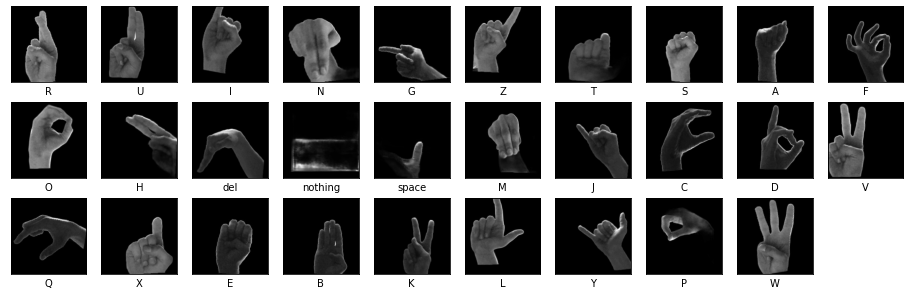

In [7]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range(len(dir_list)-1):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.set_cmap('gray')
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

In [8]:
def preprocess_data(X, y):
    np_X = np.array(X)
    x_train = np_X.reshape(-1, 200*200)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [9]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 200, 200, 3)
Test data: (8700, 200, 200, 3)


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (200,200,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(30,activation = "softmax")   #Adding the Output Layer
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)      

In [16]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [18]:
history = model.fit(x_train, y_train, validation_split=0.33,
                    epochs = 10)

Epoch 1/10
1640/1640 [==============================] - 954s 582ms/step - loss: 0.9975 - acc: 0.6734 - val_loss: 0.5715 - val_acc: 0.8128
Epoch 2/10
1640/1640 [==============================] - 936s 571ms/step - loss: 0.5738 - acc: 0.8170 - val_loss: 0.4835 - val_acc: 0.8493
Epoch 3/10
1640/1640 [==============================] - 925s 564ms/step - loss: 0.4301 - acc: 0.8682 - val_loss: 0.4050 - val_acc: 0.8790
Epoch 4/10
1640/1640 [==============================] - 946s 577ms/step - loss: 0.3455 - acc: 0.8955 - val_loss: 0.3971 - val_acc: 0.8829
Epoch 5/10
1640/1640 [==============================] - 929s 567ms/step - loss: 0.2874 - acc: 0.9130 - val_loss: 0.3914 - val_acc: 0.8837
Epoch 6/10
1640/1640 [==============================] - 931s 567ms/step - loss: 0.2419 - acc: 0.9277 - val_loss: 0.3990 - val_acc: 0.8928
Epoch 7/10
1640/1640 [==============================] - 950s 579ms/step - loss: 0.2132 - acc: 0.9375 - val_loss: 0.4071 - val_acc: 0.8941
Epoch 8/10
1640/1640 [============

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

272/272 [==============================] - 40s 147ms/step - loss: 0.3975 - acc: 0.9043
Test accuracy: 0.9042528867721558
Test loss: 0.3974611461162567


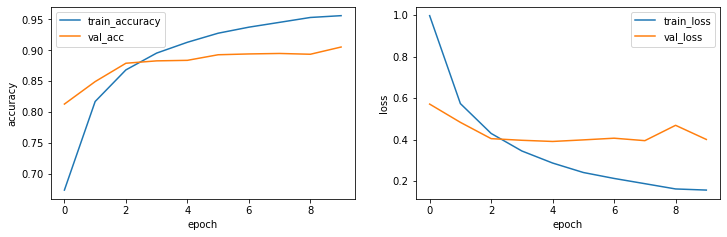

In [21]:
def plot_results(model):

    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['acc'], label = 'train_accuracy')
    plt.plot(history.history['val_acc'], label = 'val_acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()


plot_results(model)

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())